# Azure Computer Vision OCR

Detects the text in an image using optical character recognition (OCR). This notebook includes a function for overlaying the results on top of the original image. This function is standardised so that it is also compatible with the AWS and Google Cloud alternatives in this repository.

For images of handwriting, Azure has a variant on it's OCR API specifically for this. This achieves much better performance for handwritten text than the regular text recognition services offered by Azure, AWS, and Google Cloud. See <a href="https://github.com/AidanCooper/cloud-API-python-notebooks/blob/master/Azure/AzureComputerVisionHandwrittenOCR/azure-computer-vision-handwritten-OCR.ipynb">this notebook</a> for an implementation of Azure Handwritten OCR.

<a href="https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/home">Azure Computer Vision Documentation</a>

In [1]:
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 9)

In [2]:
def azure_text(image):
    """Function that sends cell image to Microsoft Computer vision API for
    text recognition. Receives and returns the results as polygons.
    """ 
    api_key = 'YOUR API KEY HERE'
    region = 'westeurope'
    with open(image, 'rb') as image_file:
        content = image_file.read()
    headers = {'Content-Type': 'application/octet-stream',
               'Ocp-Apim-Subscription-Key': api_key}
    
    response = requests.post("https://{}.api.cognitive.microsoft.com/vision/v2.0/ocr".format(region), headers=headers, data=content)

    polygons = []
    for region in response.json()['regions']:
        for line in region['lines']:
            for word in line['words']:
                box = word['boundingBox'].split(',')
                box = [int(x) for x in box]
                box2 = [box[0], box[1], box[0]+box[2], box[1], box[0]+box[2], box[1]+box[3], box[0], box[1]+box[3]]
                text = word['text']
                polygons.append((box2, text))
    
    return polygons

In [3]:
img = 'einsteinquote.jpg'
result = azure_text(img)

In [4]:
def plot_overlay(img, polygons, remove_long_boxes=False, remove_short_boxes=False,
                 color='k', fontsize=28, alpha=0.3, boxcolor='y'):
    """Function that overlays text labels on original image.
    
    remove_long_boxes (bool) will ignore labels with bounding boxes that are wider
    than half the image width. Depending on the image and the API service being used,
    this may be necessary to prevent overlapping, redundant boxes from being displayed.
    
    remove_short_boxes (bool) will ignore labels with bounding boxes that are thinner
    than a quarter of the image width. Depending on the image and the API service being
    used, this may be necessary to prevent redundant small boxes from being displayed.
    
    The fontsize variable should be manually adjusted to fit the image text size.
    """
    image = Image.open(img)
    ax = plt.imshow(image, alpha=alpha)
    for polygon in polygons:
        vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
        text = polygon[1]
        if remove_long_boxes:
            if vertices[1][0]-vertices[0][0] > image.size[0]/2:
                continue
        if remove_short_boxes:
            if vertices[1][0]-vertices[0][0] < image.size[0]/4:
                continue            
        patch = Polygon(vertices, closed=True, fill=False, linewidth=1, color=boxcolor)
        ax.axes.add_patch(patch)
        plt.text((vertices[0][0]+vertices[2][0])/2,
                 (vertices[0][1]+vertices[2][1])/2,
                  text, fontsize=fontsize, color=color,
                  va="center", ha="center")
    plt.axis("off")
    return

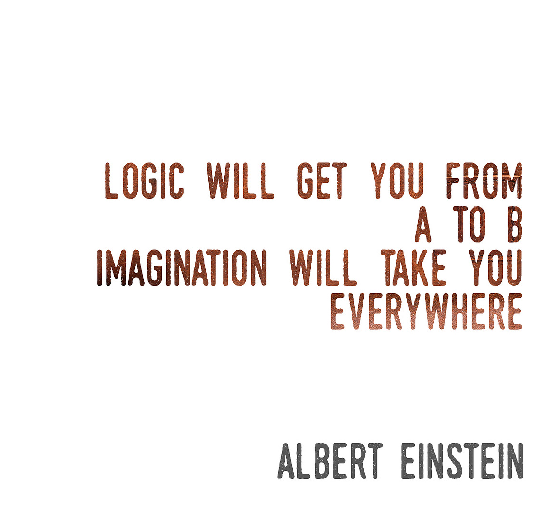

In [5]:
plt.imshow(Image.open(img))
plt.axis('off');

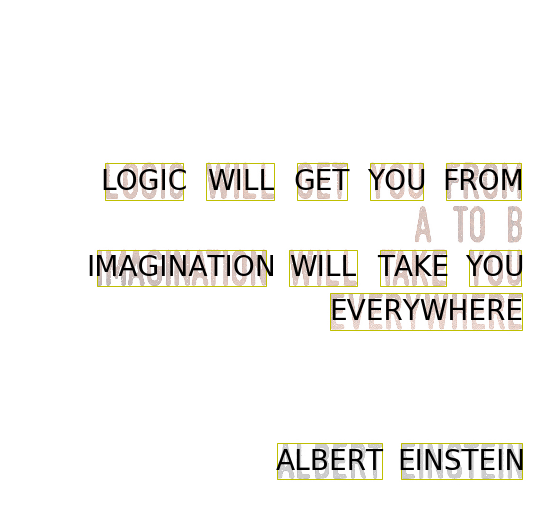

In [6]:
plot_overlay(img, result)

In [7]:
# Print just the text
for item in result:
    print(item[1])

LOGIC
WILL
GET
YOU
FROM
IMAGINATION
WILL
TAKE
YOU
EVERYWHERE
ALBERT
EINSTEIN
